## 5 Sparse Logistic Regression {-}

### 5.1 {-}

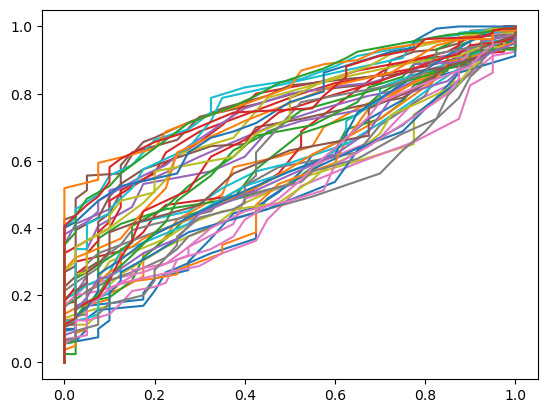

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
df = pd.read_csv('spectf.csv', header=None)
mat = df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(mat[:, 1:], mat[:, 0], test_size=.25)


def plot_roc(X_train, y_train):
    for f in range(X_train.shape[1]):
        x = X_train[:, f].reshape(-1,1)
        clf = LogisticRegression()
        clf.fit(x, y_train)
        
        y_pred = clf.predict_proba(x)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
        auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
        plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

plot_roc(X_train, y_train)




### 5.2 {-}

In [45]:
# create list of sets of predictors
# for set of single predictors use all 44 single predictors
predictors = []
for i in range(X_train.shape[1]):
    predictors.append([i])

# get all uniue combinations of predictor pairs
# filter for least correlated pairs
two_pairs_matrix = np.zeros((946,3))
x = 0
for j in range(X_train.shape[1]-1):
    for k in range(j+1, X_train.shape[1]):
        two_pairs_matrix[x,0] = j
        two_pairs_matrix[x,1] = k
        cor = np.corrcoef(X_train[j], X_train[k])[0,1]
        two_pairs_matrix[x,2] = abs(cor)
        x+=1
sort = two_pairs_matrix[two_pairs_matrix[:, 2].argsort()]
sort = sort[:256, :]
for i in range(sort.shape[0]):
    predictors.append([int(sort[i,1]), int(sort[i,0])])






[[ 0.          1.          0.26297666]
 [ 0.          2.          0.37252279]
 [ 0.          3.          0.07722901]
 ...
 [41.         42.          0.48541838]
 [41.         43.          0.25299031]
 [42.         43.          0.09012411]]
300


### 5.3 {-}

Best Training AUC: 0.8759


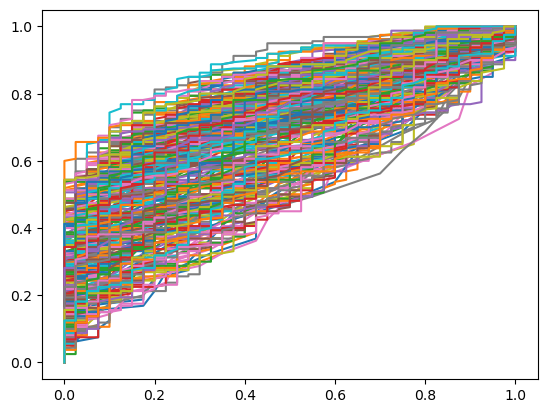

In [76]:
def plot_roc_300(X_train, y_train):
    best_auc = 0
    best_preds = None
    best_mod = None
    for f in (predictors):
        if len(f) == 1:
            x = X_train[:, f].reshape(-1,1)
        else:
            x = X_train[:, f]
        clf = LogisticRegression(penalty='none')
        clf.fit(x, y_train)
        
        y_pred = clf.predict_proba(x)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
        auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
        if auc > best_auc:
            best_auc = auc
            best_preds = f
            best_mod = clf

        plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))
    return best_auc, best_preds, best_mod

best_auc, best_preds, best_mod = plot_roc_300(X_train, y_train)
print('Best Training AUC:', best_auc)

### 5.4 {-}

[42, 29]
Train AUC: 0.8759
Test AUC: 0.6776
train accuracy: 0.865
test accuracy: 0.7164179104477612


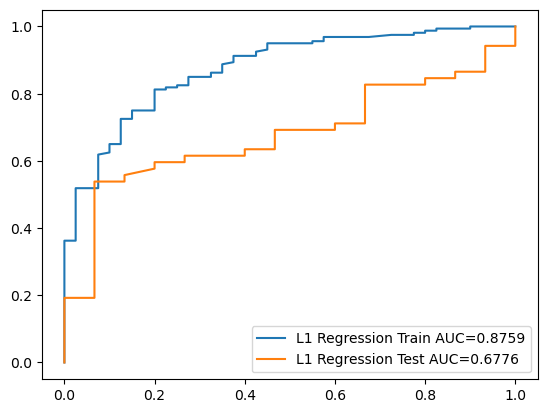

In [85]:
print(best_preds)
X_train_best = X_train[:, best_preds]
X_test_best = X_test[:, best_preds]

fig, ax = plt.subplots()

y_pred = best_mod.predict_proba(X_train_best)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
print('Train AUC:',auc)
ax.plot(fpr,tpr,label="L1 Regression Train AUC="+str(auc))

y_pred = best_mod.predict_proba(X_test_best)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('Test AUC:',auc)

ax.plot(fpr,tpr,label="L1 Regression Test AUC="+str(auc))
ax.legend()
train_acc = best_mod.score(X_train_best, y_train)
test_acc = best_mod.score(X_test_best, y_test)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

In [86]:
l2_lr = LogisticRegression(penalty='l2', max_iter=5000)
l2_lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

[42, 29]
Train AUC: 0.9775
Test AUC: 0.6936
train accuracy: 0.935
test accuracy: 0.6567164179104478


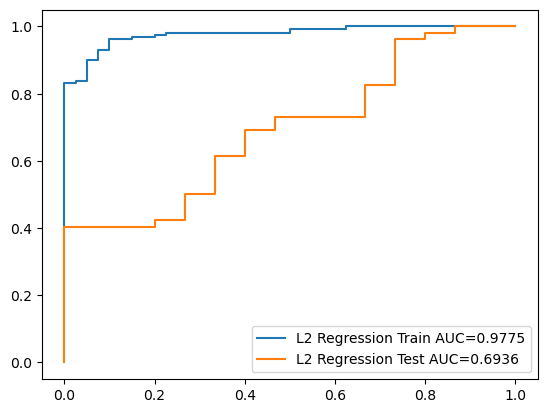

In [88]:
print(best_preds)
# X_train_best = X_train[:, best_preds]
# X_test_best = X_test[:, best_preds]

fig, ax = plt.subplots() 
y_pred = l2_lr.predict_proba(X_train)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred)
auc = round(metrics.roc_auc_score(y_train, y_pred), 4)
print('Train AUC:',auc)
ax.plot(fpr,tpr,label="L2 Regression Train AUC="+str(auc))

y_pred = l2_lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('Test AUC:',auc)

ax.plot(fpr,tpr,label="L2 Regression Test AUC="+str(auc))
ax.legend()

train_acc = l2_lr.score(X_train, y_train)
test_acc = l2_lr.score(X_test, y_test)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)